In [12]:
#import des bibilothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('max_column', 1000)
pd.set_option('max_rows', 1000)

print("import ok")

import ok


In [13]:
#import de données 
train = pd.read_csv("../3_Uploaded_Data/20220426/Train.csv")
test = pd.read_csv("../3_Uploaded_Data/20220426/Test.csv")
variableDefinitions = pd.read_csv("../3_Uploaded_Data/20220426/VariableDefinitions.csv")

In [14]:
#Definition des différentes variables
variableDefinitions

Column Name                                         Definition
0                      id                 Unique identifier for each tourist
1                 country                The country a tourist coming  from.
2               age_group                        The age group of a tourist.
3             travel_with  The relation of people a tourist travel with t...
4            total_female                            Total number of females
5              total_male                              Total number of males
6                 purpose                  The purpose of visiting  Tanzania
7           main_activity           The main activity of tourism in Tanzania
8            infor_source  The source of information about tourism in Tan...
9         tour_arrangment                The arrangment of visiting Tanzania
10  package_transport_int  If the tour package include international tran...
11   package_accomodation  If the tour package include accommodation service
12           package_food           If the tour package include food service
13   package_transport_tz  If the tour package include transport service ...
14    package_sightseeing    If the tour package include sightseeing service
15    package_guided_tour             If the tour package include tour guide
16      package_insurance      if the tour package include insurance service
17         night_mainland  Number of nights a tourist spent in Tanzania m...
18         night_zanzibar       Number of nights a tourist spent in Zanzibar
19           payment_mode            The mode of payment for tourism service
20          first_trip_tz                If it was a first  trip to Tanzania
21        most_impressing               what impressed a toursit in Tanzania
22             total_cost    The total tourist expenditure  in TZS(currency)

In [15]:
#affichage des données de tests
train.head()

ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity  \
0         1.0            Leisure and Holidays  Wildlife tourism   
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement package_transport_int  \
0            Friends, relatives      Independent                    No   
1                        others      Independent                    No   
2            Friends, relatives      Independent                    No   
3  Travel, agent, tour operator     Package Tour                    No   
4  Travel, agent, tour operator      Independent                    No   

  package_accomodation package_food package_transport_tz package_sightseeing  \
0                   No           No                   No                  No   
1                   No           No                   No                  No   
2                   No           No                   No                  No   
3                  Yes          Yes                  Yes                 Yes   
4                   No           No                   No                  No   

  package_guided_tour package_insurance  night_mainland  night_zanzibar  \
0                  No                No            13.0             0.0   
1                  No                No            14.0             7.0   
2                  No                No             1.0            31.0   
3                 Yes                No            11.0             0.0   
4                  No                No             7.0             4.0   

  payment_mode first_trip_tz                       most_impressing  total_cost  
0         Cash            No                       Friendly People    674602.5  
1         Cash           Yes  Wonderful Country, Landscape, Nature   3214906.5  
2         Cash            No                  Excellent Experience   3315000.0  
3         Cash           Yes                       Friendly People   7790250.0  
4         Cash           Yes                           No comments   1657500.0

In [16]:
#affichage des données de validation 
test.head()

ID         country age_group        travel_with  total_female  \
0     tour_1       AUSTRALIA     45-64             Spouse           1.0   
1   tour_100    SOUTH AFRICA     25-44  Friends/Relatives           0.0   
2  tour_1001         GERMANY     25-44  Friends/Relatives           3.0   
3  tour_1006          CANADA    24-Jan  Friends/Relatives           2.0   
4  tour_1009  UNITED KINGDOM     45-64  Friends/Relatives           2.0   

   total_male               purpose     main_activity  \
0         1.0  Leisure and Holidays  Wildlife tourism   
1         4.0              Business  Wildlife tourism   
2         0.0  Leisure and Holidays     Beach tourism   
3         0.0  Leisure and Holidays  Cultural tourism   
4         2.0  Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement package_transport_int  \
0  Travel, agent, tour operator     Package Tour                   Yes   
1       Tanzania Mission Abroad     Package Tour                   Yes   
2            Friends, relatives      Independent                    No   
3                        others      Independent                    No   
4            Friends, relatives     Package Tour                   Yes   

  package_accomodation package_food package_transport_tz package_sightseeing  \
0                  Yes          Yes                  Yes                 Yes   
1                  Yes           No                   No                  No   
2                   No           No                   No                  No   
3                   No           No                   No                  No   
4                  Yes          Yes                  Yes                  No   

  package_guided_tour package_insurance  night_mainland  night_zanzibar  \
0                 Yes               Yes              10               3   
1                  No                No              13               0   
2                  No                No               7              14   
3                  No                No               0               4   
4                  No                No              10               0   

  payment_mode first_trip_tz                       most_impressing  
0         Cash           Yes                              Wildlife  
1         Cash            No  Wonderful Country, Landscape, Nature  
2         Cash            No                           No comments  
3         Cash           Yes                       Friendly People  
4         Cash           Yes                       Friendly People

In [17]:
#Dimension des différentes jeu de donnée
train.shape, test.shape

((4809, 23), (1601, 22))

In [18]:
#description des variables
train.describe(include = 'all')

ID                   country age_group travel_with  total_female  \
count     4809                      4809      4809        3695   4806.000000   
unique    4809                       105         4           5           NaN   
top     tour_0  UNITED STATES OF AMERICA     25-44       Alone           NaN   
freq         1                       695      2487        1265           NaN   
mean       NaN                       NaN       NaN         NaN      0.926758   
std        NaN                       NaN       NaN         NaN      1.288242   
min        NaN                       NaN       NaN         NaN      0.000000   
25%        NaN                       NaN       NaN         NaN      0.000000   
50%        NaN                       NaN       NaN         NaN      1.000000   
75%        NaN                       NaN       NaN         NaN      1.000000   
max        NaN                       NaN       NaN         NaN     49.000000   

         total_male               purpose     main_activity  \
count   4804.000000                  4809              4809   
unique          NaN                     7                 9   
top             NaN  Leisure and Holidays  Wildlife tourism   
freq            NaN                  2840              2259   
mean       1.009575                   NaN               NaN   
std        1.138865                   NaN               NaN   
min        0.000000                   NaN               NaN   
25%        1.000000                   NaN               NaN   
50%        1.000000                   NaN               NaN   
75%        1.000000                   NaN               NaN   
max       44.000000                   NaN               NaN   

                         info_source tour_arrangement package_transport_int  \
count                           4809             4809                  4809   
unique                             8                2                     2   
top     Travel, agent, tour operator      Independent                    No   
freq                            1913             2570                  3357   
mean                             NaN              NaN                   NaN   
std                              NaN              NaN                   NaN   
min                              NaN              NaN                   NaN   
25%                              NaN              NaN                   NaN   
50%                              NaN              NaN                   NaN   
75%                              NaN              NaN                   NaN   
max                              NaN              NaN                   NaN   

       package_accomodation package_food package_transport_tz  \
count                  4809         4809                 4809   
unique                    2            2                    2   
top                      No           No                   No   
freq                   2602         2748                 2919   
mean                    NaN          NaN                  NaN   
std                     NaN          NaN                  NaN   
min                     NaN          NaN                  NaN   
25%                     NaN          NaN                  NaN   
50%                     NaN          NaN                  NaN   
75%                     NaN          NaN                  NaN   
max                     NaN          NaN                  NaN   

       package_sightseeing package_guided_tour package_insurance  \
count                 4809                4809              4809   
unique                   2                   2                 2   
top                     No                  No                No   
freq                  3319                3259              4079   
mean                   NaN                 NaN               NaN   
std                    NaN                 NaN               NaN   
min                    NaN                 NaN               NaN   
25%                 

In [19]:
test.describe(include = 'all')

ID                   country age_group travel_with  total_female  \
count     1601                      1601      1601        1274   1600.000000   
unique    1601                        87         4           5           NaN   
top     tour_1  UNITED STATES OF AMERICA     25-44       Alone           NaN   
freq         1                       198       866         403           NaN   
mean       NaN                       NaN       NaN         NaN      0.925625   
std        NaN                       NaN       NaN         NaN      1.169807   
min        NaN                       NaN       NaN         NaN      0.000000   
25%        NaN                       NaN       NaN         NaN      0.000000   
50%        NaN                       NaN       NaN         NaN      1.000000   
75%        NaN                       NaN       NaN         NaN      1.000000   
max        NaN                       NaN       NaN         NaN     20.000000   

         total_male               purpose     main_activity  \
count   1599.000000                  1601              1601   
unique          NaN                     7                 9   
top             NaN  Leisure and Holidays  Wildlife tourism   
freq            NaN                   932               767   
mean       1.056911                   NaN               NaN   
std        1.309879                   NaN               NaN   
min        0.000000                   NaN               NaN   
25%        1.000000                   NaN               NaN   
50%        1.000000                   NaN               NaN   
75%        1.000000                   NaN               NaN   
max       40.000000                   NaN               NaN   

                         info_source tour_arrangement package_transport_int  \
count                           1601             1601                  1601   
unique                             8                2                     2   
top     Travel, agent, tour operator      Independent                    No   
freq                             655              856                  1099   
mean                             NaN              NaN                   NaN   
std                              NaN              NaN                   NaN   
min                              NaN              NaN                   NaN   
25%                              NaN              NaN                   NaN   
50%                              NaN              NaN                   NaN   
75%                              NaN              NaN                   NaN   
max                              NaN              NaN                   NaN   

       package_accomodation package_food package_transport_tz  \
count                  1601         1601                 1601   
unique                    2            2                    2   
top                      No           No                   No   
freq                    880          914                  983   
mean                    NaN          NaN                  NaN   
std                     NaN          NaN                  NaN   
min                     NaN          NaN                  NaN   
25%                     NaN          NaN                  NaN   
50%                     NaN          NaN                  NaN   
75%                     NaN          NaN                  NaN   
max                     NaN          NaN                  NaN   

       package_sightseeing package_guided_tour package_insurance  \
count                 1601                1601              1601   
unique                   2                   2                 2   
top                     No                  No                No   
freq                  1116                1103              1364   
mean                   NaN                 NaN               NaN   
std                    NaN                 NaN               NaN   
min                    NaN                 NaN               NaN   
25%                 

In [25]:
#visualisation
import pandas_profiling
profile_train = train.profile_report(title="Appercu des varaibles train set")
profile_test = test.profile_report(title="Appercu des varaibles test set")

In [29]:
profile_train

In [30]:
profile_test

In [31]:
#Enregistement en local de la visualisation des données du train
profile_train.to_file(output_file="../4_Analysis/test_visualisation.html")
#Enregistement en local de la visualisation des données du test
profile_test.to_file(output_file="../4_Analysis/test_visualisation.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
#colonne avec valeurs manquantes dans le train set
train.isna().sum()[train.isna().sum() > 0]

travel_with        1114
total_female          3
total_male            5
most_impressing     313
dtype: int64

In [33]:
#colonne avec valeurs manquantes dans le tes set
test.isna().sum()[test.isna().sum() > 0]

travel_with        327
total_female         1
total_male           2
most_impressing    111
dtype: int64

In [34]:
#colonne avec valuers manquantes
col_with_missing_values = test.isna().sum()[test.isna().sum() > 0].index

In [35]:
col_with_missing_values

Index(['travel_with', 'total_female', 'total_male', 'most_impressing'], dtype='object')

In [36]:
#pourcentage de valeurs manquantes
train.isna().sum()/train.shape[0]*100

ID                        0.000000
country                   0.000000
age_group                 0.000000
travel_with              23.164899
total_female              0.062383
total_male                0.103972
purpose                   0.000000
main_activity             0.000000
info_source               0.000000
tour_arrangement          0.000000
package_transport_int     0.000000
package_accomodation      0.000000
package_food              0.000000
package_transport_tz      0.000000
package_sightseeing       0.000000
package_guided_tour       0.000000
package_insurance         0.000000
night_mainland            0.000000
night_zanzibar            0.000000
payment_mode              0.000000
first_trip_tz             0.000000
most_impressing           6.508630
total_cost                0.000000
dtype: float64

In [37]:
test.isna().sum()/test.shape[0]*100

ID                        0.000000
country                   0.000000
age_group                 0.000000
travel_with              20.424735
total_female              0.062461
total_male                0.124922
purpose                   0.000000
main_activity             0.000000
info_source               0.000000
tour_arrangement          0.000000
package_transport_int     0.000000
package_accomodation      0.000000
package_food              0.000000
package_transport_tz      0.000000
package_sightseeing       0.000000
package_guided_tour       0.000000
package_insurance         0.000000
night_mainland            0.000000
night_zanzibar            0.000000
payment_mode              0.000000
first_trip_tz             0.000000
most_impressing           6.933167
dtype: float64

In [38]:
#types des variables
train.dtypes.value_counts()

object     18
float64     5
dtype: int64

In [39]:
#suppresion de la colonne ID
train_without_ID_col = train.drop('ID', axis = 1)

In [40]:
#Analyse des colonnes catégorielles
cat_columns = train_without_ID_col.select_dtypes(exclude = 'number').columns
num_columns = train_without_ID_col.select_dtypes(exclude = 'object').columns

In [41]:
cat_columns

Index(['country', 'age_group', 'travel_with', 'purpose', 'main_activity',
       'info_source', 'tour_arrangement', 'package_transport_int',
       'package_accomodation', 'package_food', 'package_transport_tz',
       'package_sightseeing', 'package_guided_tour', 'package_insurance',
       'payment_mode', 'first_trip_tz', 'most_impressing'],
      dtype='object')

In [42]:
num_columns

Index(['total_female', 'total_male', 'night_mainland', 'night_zanzibar',
       'total_cost'],
      dtype='object')

## Gestion des valeurs manquantes

### Valeurs numériques

<AxesSubplot:xlabel='total_female', ylabel='Density'>

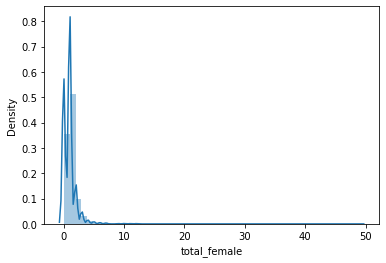

In [50]:
sns.distplot(a = train['total_female'], kde = True)

<AxesSubplot:xlabel='total_female', ylabel='Density'>

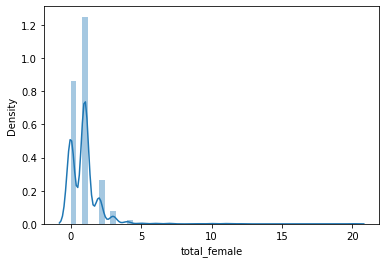

In [55]:
sns.distplot(a = test['total_female'], kde = True)

<AxesSubplot:xlabel='total_male', ylabel='Density'>

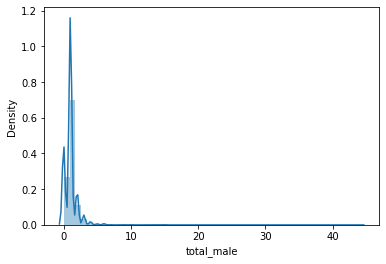

In [64]:
sns.distplot(a = train['total_male'], kde = True)

<AxesSubplot:xlabel='total_male', ylabel='Density'>

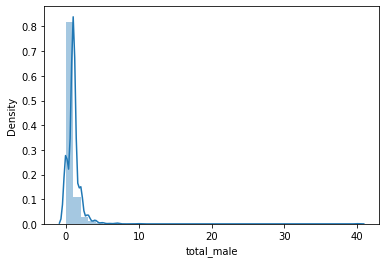

In [65]:
sns.distplot(a = test['total_male'], kde = True)

In [68]:
#d'après le graphique, les données ne sont normalement distribuées, on alors remplace les valeurs manquantes par l'écart type
values_num = {"total_female": train_without_ID_col['total_female'].std(), 
              "total_male": train_without_ID_col['total_male'].std()}

train_without_ID_col = train_without_ID_col.fillna(value=values_num)

In [69]:
test = test.fillna(value=values_num)

### Valeurs catégorielles

In [74]:
#les valuers manquantes seront remplacées par les 'inconnu'
values_cat = {"travel_with": 'inconnu', "most_impressing": 'inconnu'}

train_without_ID_col = train_without_ID_col.fillna(value=values_cat)
test = test.fillna(value=values_cat)

In [76]:
test_without_ID_col = test.drop('ID', axis = 1)

In [77]:
test_without_ID_col.shape, train_without_ID_col.shape

((1601, 21), (4809, 22))

## Création du modèle et prediction

### Modèle avec CatbosstRegressor

In [78]:
X = train_without_ID_col.drop('total_cost', axis = 1)
y = train_without_ID_col['total_cost']
tes = test_without_ID_col

In [79]:
cate_features_index = np.where(X.dtypes == object) [0]; cate_features_index

array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19, 20],
      dtype=int64)

In [80]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 3536)

In [86]:
X_train.shape, X_valid.shape

((3847, 21), (962, 21))

In [87]:
len(y_train), len(y_valid)

(3847, 962)

In [95]:
model = CatBoostRegressor(iterations=50000, learning_rate=0.01, random_seed=1234, eval_metric='MAE')
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_valid, y_valid)], early_stopping_rounds=500,verbose=100,cat_features=cate_features_index)

0:	learn: 7996283.5568702	test: 7996413.8507516	test1: 7928899.9223692	best: 7928899.9223692 (0)	total: 35.2ms	remaining: 29m 19s
100:	learn: 5941548.4916891	test: 5926271.6171646	test1: 5925796.8404348	best: 5925796.8404348 (100)	total: 3.4s	remaining: 28m 1s
200:	learn: 5270733.3693253	test: 5260033.3733467	test1: 5347172.0710198	best: 5347172.0710198 (200)	total: 6.86s	remaining: 28m 19s
300:	learn: 5025430.2829525	test: 5018133.4793661	test1: 5185910.7310808	best: 5185910.7310808 (300)	total: 10.2s	remaining: 28m
400:	learn: 4911176.3277627	test: 4913344.2448973	test1: 5118404.9180426	best: 5118067.8882310 (395)	total: 13.2s	remaining: 27m 11s
500:	learn: 4835714.9218463	test: 4849000.6859015	test1: 5078623.0862828	best: 5078623.0862828 (500)	total: 16.3s	remaining: 26m 45s
600:	learn: 4775376.9234572	test: 4796420.8670342	test1: 5044532.2230530	best: 5044532.2230530 (600)	total: 19.4s	remaining: 26m 37s
700:	learn: 4729579.9210671	test: 4757988.8369558	test1: 5022788.5838445	best:

In [96]:
prediction = model.predict(X_valid)
erreur = mean_absolute_error(y_valid, prediction)

In [97]:
erreur

4927361.425375338

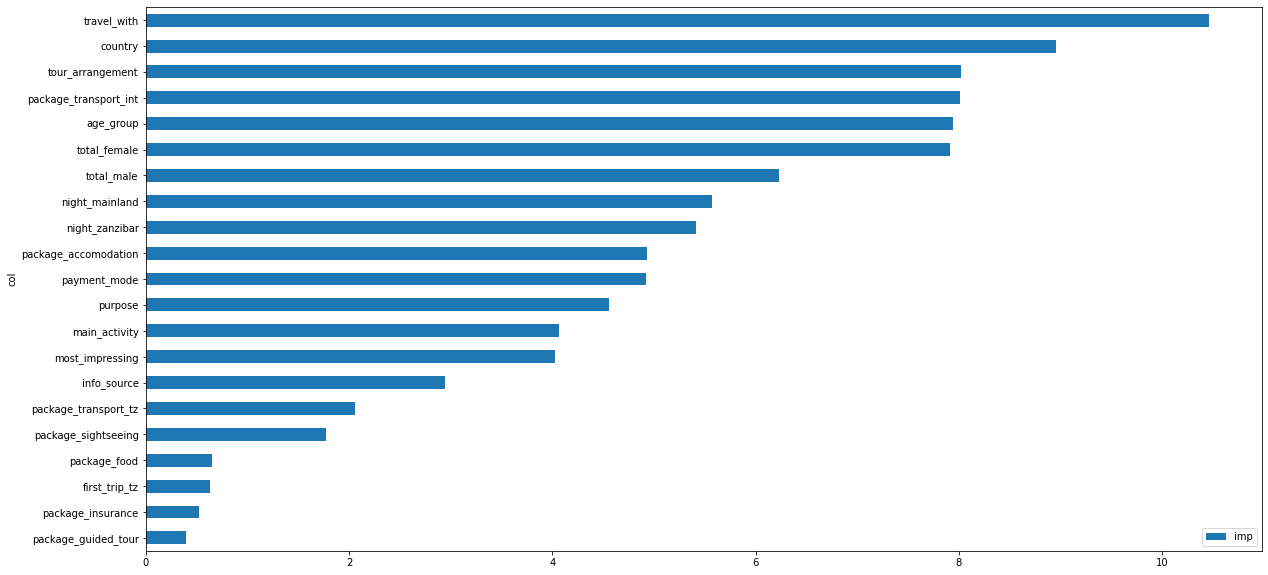

In [94]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [109]:
#prediction jeu de test
test_pred = model.predict(test_without_ID_col)

In [111]:
#fichier de soummision 
submit1 = pd.DataFrame({'test_id': test['ID'], 'total_cost': test_pred})
submit1.to_csv("../6_Final/submit1.csv", index = False)

### Modèle avec LGBMRegressor

In [ ]:
err=[]
y_pred_totcb=[]

fold=KFold(n_splits=5, random_state=5687)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m1 = CatBoostRegressor(iterations=50000, learning_rate=0.01, random_seed=1234, eval_metric='RMSE')
    m1.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500,verbose=100,cat_features=cate_features_index)
    preds = m1.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err.append(np.sqrt(mean_squared_error(y_test,preds)))
    p2 = m1.predict(tes)
    y_pred_totcb.append(p2)
np.mean(err)